In [52]:
import numpy as np
import matplotlib.pylab as plt

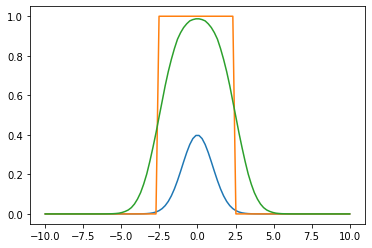

In [53]:
def gaussian(x,m=0,s=1):
    return 1.0/np.sqrt(2*np.pi*s**2) * np.exp(-((x-m)/s)**2 /2)

def rect(x,w=2.5):
    return np.where(np.abs(x)<=w,1,0)

def gausCuad(df,t,r):
    lista = []
    yi, wi = np.polynomial.legendre.leggauss(500)
    xi = yi/(1-yi**2)
    dw = ((1+yi**2)/(1-yi**2)**2)*wi
    df1 = dw*df(gaussian,r,xi,t) 
    integ = sum(df1)
    return integ

def corrida(g,f,x,t):
    return g(x)*f(t-x)

x=np.linspace(-10,10,100)
t=np.linspace(-10,10,100)
der = [gausCuad(corrida,i,rect) for i in t]
plt.plot(x,gaussian(x,0,1))
plt.plot(x, rect(x-t[49],2.5))
plt.plot(t,der)

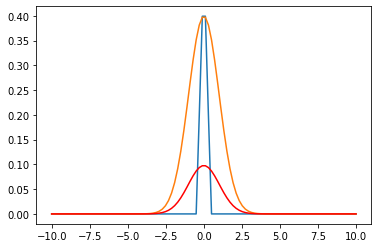

In [54]:
def trian (x):
    a = -np.abs(x)+0.5
    a[a<0]=0
    return a
der = [gausCuad(corrida,i,trian) for i in t]
plt.plot(x,trian(x))
plt.plot(x,gaussian(x))
plt.plot(t,der,'r')

In [ ]:
def fu(x,n):
    return (np.sin(x)/x)**n

def gausCuad(df,i,f,n,a):
    lista = []
    for j in range(i,f):
        yi, wi = np.polynomial.legendre.leggauss(j)
        xi = a*(1+yi)/(1-yi)
        dw = (2*a/(1-yi)**2)*wi
        df1 = dw*df(xi,n) 
        integ = sum(df1)
        lista.append(integ)
    return lista
i,f=700,1000
valores = []
for i in np.arange(1,3):
    a = gausCuad(fu,i,f,i,1)
    valores.append(a)
    plt.figure()
    plt.plot(np.arange(i,f),a)
    plt.title(i)
    print('El valor de la integral con {} n es de: {}'.format(i,np.mean(a)))

In [ ]:
ana = np.array([1/2,1/2,3/8,1/3,115/384])*np.pi